In [1]:
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from collections import defaultdict
import thesisv3 as tv3

# Import the classes
from thesisv3.classism import MusicFileManager, MusicSegmentAnalyzer, MusicVisualizer, GraphBuilder, GraphBatcher
from thesisv3.validation.clustering import GraphKMeans
from thesisv3.preprocessing.preprocessing import segments_to_graph, kneighbors_graph

pygame 2.6.1 (SDL 2.28.4, Python 3.11.6)
Hello from the pygame community. https://www.pygame.org/contribute.html


D:\Docs\Ateneo\Thesis\thesisv3-pypi\venv\Lib\site-packages\tslearn\bases\bases.py:15: UserWarning: h5py not installed, hdf5 features will not be supported.
Install h5py to use hdf5 features: http://docs.h5py.org/
  warn(h5py_msg)


In [2]:
file_manager = MusicFileManager()
file_manager.display_selector()

In [3]:
file_manager.selected_file

'.\\music_database\\Chopin_-_Etude_Op.10_No.1_Waterfall_Chopin_in_C_Major.mxl'

In [4]:
analyzer = MusicSegmentAnalyzer()

In [6]:
analyzer.nmat

,onset_beats,onset_beats_in_measure,duration_beats,midi_pitch,pitch_class,octave,beat_strength,mobility,tessitura


In [5]:
analyzer.run(file_manager.selected_file)

ValueError: Found array with 0 sample(s) (shape=(0, 1)) while a minimum of 1 is required by MinMaxScaler.

In [8]:
builder = GraphBuilder(distance_matrix=analyzer.distance_matrix, segments=analyzer.prepped_segments, k=5)
G = builder.construct_graph()
labels = nx.get_node_attributes(G, 'label')
labels

{0: 0.24,
 1: 0.35,
 2: 0.34,
 3: 0.22,
 4: 0.41,
 5: 0.29,
 6: 0.62,
 7: 0.66,
 8: 0.74,
 9: 0.77}

In [5]:
# class GraphBuilder:
#     def __init__(self, k: int, distance_matrix: np.ndarray, segments: list[pd.DataFrame]):
#         self.k = k
#         self.graph = None
#         self.graphs = None
#         self.distance_matrix = distance_matrix
#         self.segments = segments
#     
#     def construct_graph(self):
#         knn_graph = kneighbors_graph(self.distance_matrix, n_neighbors=self.k, mode='connectivity')
#         G = nx.from_scipy_sparse_array(knn_graph)
#         
#         for i in range(len(self.segments)):
#             G.nodes[i]['label'] = self.segments[i]['expectancy'].mean()
#         
#         if not nx.is_connected(G):
#             print("The KNN graph is disjoint. Ensuring connectivity...")
#             
#             components = list(nx.connected_components(G))
#             
#             for i in range(len(components) - 1):
#                 min_dist = np.inf
#                 closest_pair = None
#                 for node1 in components[i]:
#                     for node2 in components[i + 1]:
#                         dist = self.distance_matrix[node1, node2]
#                         if dist < min_dist:
#                             min_dist = dist
#                             closest_pair = (node1, node2)
#                 G.add_edge(closest_pair[0], closest_pair[1])
#         self.graph = G
#         return G

In [6]:
# class GraphBatcher:
#     def __init__(self, k=5):
#         self.k = k
#         self.graphs = []
#         self.segments = []
#         self.distance_matrices = []
#         self.file_manager = MusicFileManager()
#         self.analyzer = MusicSegmentAnalyzer()
#         
#     def batch(self):
#         for file in self.file_manager.files:
#             print(f"Analyzing {file}")
#             try:
#                 self.analyzer.run(self.file_manager.files[file])
#                 builder = GraphBuilder(self.k,
#                                        self.analyzer.distance_matrix,
#                                        self.analyzer.prepped_segments)
#                 self.graphs.append(builder.construct_graph())
#                 self.segments.append(self.analyzer.prepped_segments)
#                 self.distance_matrices.append(self.analyzer.distance_matrix)
#                 
#                 # builder = GraphBuilder(self.k,
#                 #                        segments,
#                 #                        distance_matrix)
#                 # graph = builder.construct_graph()
#                 # self.segments.append(segments)
#                 # self.distance_matrices.append(distance_matrix)
#                 # self.graphs.append(graph)
#                 
#                 # self.segments.append(self.analyzer.prepped_segments)
#                 # self.distance_matrices.append(self.analyzer.distance_matrix)
#                 # 
#                 # builder = GraphBuilder(self.k,
#                 #                        self.analyzer.distance_matrix,
#                 #                        self.analyzer.prepped_segments)
#                 # self.graphs.append(builder.construct_graph())
#             except Exception as e:
#                 print(f"Error parsing: {file} at {self.file_manager.files[file]}. Skipping file")
#                 print(e)
#                 continue

In [5]:
batcher = GraphBatcher(5)
batcher.batch()

Analyzing Bach - Minuet in G Major
Calculated Edge Weight (0, 1)
Calculated Edge Weight (0, 2)
Calculated Edge Weight (0, 3)
Calculated Edge Weight (0, 4)
Calculated Edge Weight (0, 5)
Calculated Edge Weight (0, 6)
Calculated Edge Weight (0, 7)
Calculated Edge Weight (0, 8)
Calculated Edge Weight (0, 9)
Calculated Edge Weight (1, 2)
Calculated Edge Weight (1, 3)
Calculated Edge Weight (1, 4)
Calculated Edge Weight (1, 5)
Calculated Edge Weight (1, 6)
Calculated Edge Weight (1, 7)
Calculated Edge Weight (1, 8)
Calculated Edge Weight (1, 9)
Calculated Edge Weight (2, 3)
Calculated Edge Weight (2, 4)
Calculated Edge Weight (2, 5)
Calculated Edge Weight (2, 6)
Calculated Edge Weight (2, 7)
Calculated Edge Weight (2, 8)
Calculated Edge Weight (2, 9)
Calculated Edge Weight (3, 4)
Calculated Edge Weight (3, 5)
Calculated Edge Weight (3, 6)
Calculated Edge Weight (3, 7)
Calculated Edge Weight (3, 8)
Calculated Edge Weight (3, 9)
Calculated Edge Weight (4, 5)
Calculated Edge Weight (4, 6)
Calcu

D:\Docs\Ateneo\Thesis\thesisv3-pypi\venv\Lib\site-packages\numpy\lib\function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
D:\Docs\Ateneo\Thesis\thesisv3-pypi\venv\Lib\site-packages\numpy\lib\function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


Error parsing: Chopin - Ballade No.1 in G minor Op. 23 violin at .\music_database\Chopin_-_Ballade_No.1_in_G_minor_Op._23_violin.mxl. Skipping file
Traceback (most recent call last):
  File "D:\Docs\Ateneo\Thesis\thesisv3-pypi\thesisv3\classism.py", line 184, in batch
    self.analyzer.run(self.file_manager.files[file])
  File "D:\Docs\Ateneo\Thesis\thesisv3-pypi\thesisv3\classism.py", line 89, in run
    self.analyze_segments()
  File "D:\Docs\Ateneo\Thesis\thesisv3-pypi\thesisv3\classism.py", line 56, in analyze_segments
    ir_nmat = assign_ir_pattern_indices(ir_nmat)
              ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "D:\Docs\Ateneo\Thesis\thesisv3-pypi\thesisv3\preprocessing\preprocessing.py", line 449, in assign_ir_pattern_indices
    notematrix['pattern_index'] = indices
    ~~~~~~~~~~^^^^^^^^^^^^^^^^^
  File "D:\Docs\Ateneo\Thesis\thesisv3-pypi\venv\Lib\site-packages\pandas\core\frame.py", line 4311, in __setitem__
    self._set_item(key, value)
  File "D:\Docs\Ateneo\Thes

D:\Docs\Ateneo\Thesis\thesisv3-pypi\venv\Lib\site-packages\numpy\lib\function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
D:\Docs\Ateneo\Thesis\thesisv3-pypi\venv\Lib\site-packages\numpy\lib\function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


Calculated Edge Weight (0, 1)
Calculated Edge Weight (0, 2)
Calculated Edge Weight (0, 3)
Calculated Edge Weight (0, 4)
Calculated Edge Weight (0, 5)
Calculated Edge Weight (0, 6)
Calculated Edge Weight (0, 7)
Calculated Edge Weight (0, 8)
Calculated Edge Weight (0, 9)
Calculated Edge Weight (0, 10)
Calculated Edge Weight (0, 11)
Calculated Edge Weight (0, 12)
Calculated Edge Weight (0, 13)
Calculated Edge Weight (0, 14)
Calculated Edge Weight (0, 15)
Calculated Edge Weight (0, 16)
Calculated Edge Weight (0, 17)
Calculated Edge Weight (0, 18)
Calculated Edge Weight (0, 19)
Calculated Edge Weight (0, 20)
Calculated Edge Weight (0, 21)
Calculated Edge Weight (0, 22)
Calculated Edge Weight (0, 23)
Calculated Edge Weight (0, 24)
Calculated Edge Weight (0, 25)
Calculated Edge Weight (0, 26)
Calculated Edge Weight (0, 27)
Calculated Edge Weight (0, 28)
Calculated Edge Weight (0, 29)
Calculated Edge Weight (0, 30)
Calculated Edge Weight (0, 31)
Calculated Edge Weight (0, 32)
Calculated Edge W

D:\Docs\Ateneo\Thesis\thesisv3-pypi\venv\Lib\site-packages\numpy\lib\function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
D:\Docs\Ateneo\Thesis\thesisv3-pypi\venv\Lib\site-packages\numpy\lib\function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


Error parsing: Mozart - Sonata No.10 1st Movement K.330 at .\music_database\Mozart_-_Sonata_No._10_1st_Movement_K._330.mxl. Skipping file
Traceback (most recent call last):
  File "D:\Docs\Ateneo\Thesis\thesisv3-pypi\thesisv3\classism.py", line 184, in batch
    self.analyzer.run(self.file_manager.files[file])
  File "D:\Docs\Ateneo\Thesis\thesisv3-pypi\thesisv3\classism.py", line 89, in run
    self.analyze_segments()
  File "D:\Docs\Ateneo\Thesis\thesisv3-pypi\thesisv3\classism.py", line 54, in analyze_segments
    ir_symbols = assign_ir_symbols(narr)
                 ^^^^^^^^^^^^^^^^^^^^^^^
  File "D:\Docs\Ateneo\Thesis\thesisv3-pypi\thesisv3\preprocessing\preprocessing.py", line 325, in assign_ir_symbols
    element2 = note_array[i]
               ~~~~~~~~~~^^^
IndexError: list index out of range

Analyzing Satie - Gnossienne No.1
Calculated Edge Weight (0, 1)
Calculated Edge Weight (0, 2)
Calculated Edge Weight (0, 3)
Calculated Edge Weight (0, 4)
Calculated Edge Weight (0, 5)
Cal

In [6]:
g_kmeans = GraphKMeans(batcher.processed_files, batcher.graphs, k=4)
clustered, labels = g_kmeans.get_labels()
clustered

,file,label
0,Bach - Minuet in G Major,2
1,Beethoven - Piano Sonata No. 20 in G Major Op....,2
2,Chopin - Etude Op.25 No.11 in A minor Winter Wind,0
3,Chopin - Waltz Opus 64 No.1 in D Major Minute ...,1
4,Chopin - Waltz Opus 64 No.2 in C Minor,1
5,Chopin - Waltz Opus 69 No.1 in A Major,1
6,Mozart - Menuett in G Major,3


In [30]:
labels = nx.get_node_attributes(g_kmeans.graphs[3], 'label')
labels

{0: 0.33,
 1: 0.24,
 2: 0.46,
 3: 0.3,
 4: 0.37,
 5: 0.46,
 6: 0.45,
 7: 0.49,
 8: 0.48,
 9: 0.53,
 10: 0.41,
 11: 0.43,
 12: 0.49,
 13: 0.46,
 14: 0.44,
 15: 0.47,
 16: 0.49,
 17: 0.48,
 18: 0.47,
 19: 0.46,
 20: 0.49,
 21: 0.46,
 22: 0.46,
 23: 0.47,
 24: 0.5,
 25: 0.46,
 26: 0.48,
 27: 0.51,
 28: 0.51,
 29: 0.45}

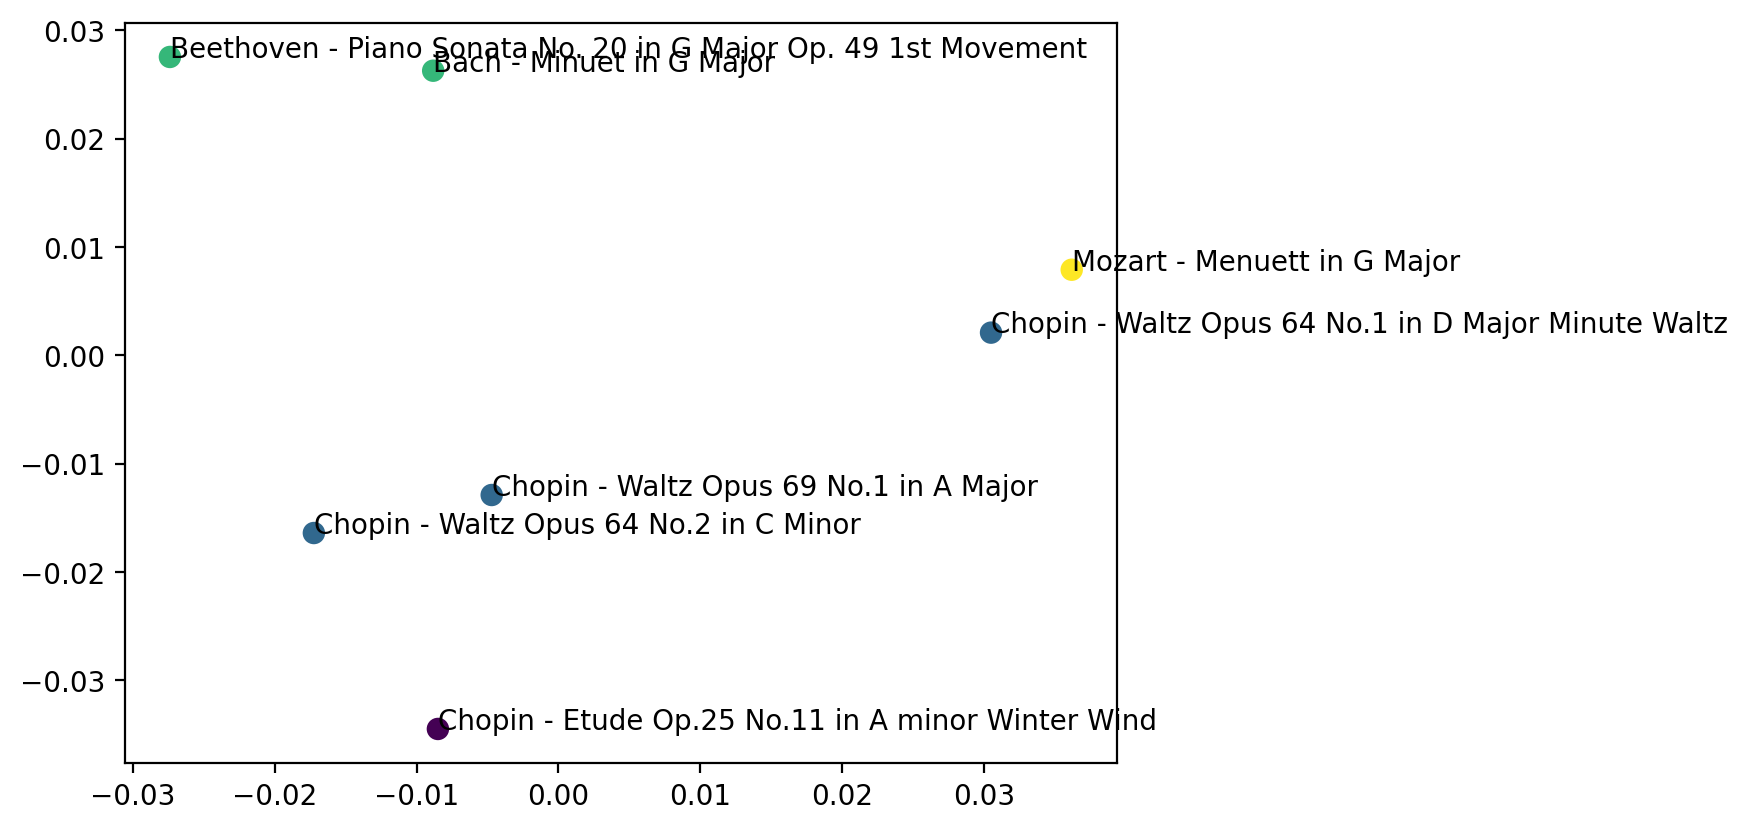

In [7]:
g_kmeans.visualize(display_file_name=True)

In [12]:
batcher.graphs

In [16]:
# def prep_for_wl_kernel(graphs: list[nx.Graph]):
#     all_labels = np.concatenate([list(nx.get_node_attributes(G, 'label').values()) for G in graphs])
#     num_bins = int(np.ceil(1 + np.log2(len(all_labels))))
#     global_bins = np.linspace(all_labels.min(), all_labels.max(), num_bins + 1)
#     processed_graphs = []
#     for G in graphs:
#         labels = np.array(list(nx.get_node_attributes(G, 'label').values()))
#         binned_labels = np.digitize(labels, bins=global_bins)  # Bin the labels
#         label_dict = {node: str(binned_labels[i]) for i, node in enumerate(G.nodes)}  # Convert to string
# 
#         # Assign the new labels to the graph
#         nx.set_node_attributes(G, label_dict, 'label')
#         processed_graphs.append(G)
# 
#     return processed_graphs

In [7]:
labels = nx.get_node_attributes(batcher.graphs[0], 'label')
labels

{0: 0.51,
 1: 0.56,
 2: 0.54,
 3: 0.49,
 4: 0.57,
 5: 0.51,
 6: 0.53,
 7: 0.58,
 8: 0.56,
 9: 0.57}

In [3]:
import grakel as gk

In [7]:
we = gk.WeisfeilerLehman(normalize=True)
type(we)

grakel.kernels.weisfeiler_lehman.WeisfeilerLehman

In [14]:
from thesisv3.validation.tuners import KNNGraphTuner
import grakel as gk

Analyzing Bach - Minuet in G Major
Calculated Edge Weight (0, 1)
Calculated Edge Weight (0, 2)
Calculated Edge Weight (0, 3)
Calculated Edge Weight (0, 4)
Calculated Edge Weight (0, 5)
Calculated Edge Weight (0, 6)
Calculated Edge Weight (0, 7)
Calculated Edge Weight (0, 8)
Calculated Edge Weight (0, 9)
Calculated Edge Weight (1, 2)
Calculated Edge Weight (1, 3)
Calculated Edge Weight (1, 4)
Calculated Edge Weight (1, 5)
Calculated Edge Weight (1, 6)
Calculated Edge Weight (1, 7)
Calculated Edge Weight (1, 8)
Calculated Edge Weight (1, 9)
Calculated Edge Weight (2, 3)
Calculated Edge Weight (2, 4)
Calculated Edge Weight (2, 5)
Calculated Edge Weight (2, 6)
Calculated Edge Weight (2, 7)
Calculated Edge Weight (2, 8)
Calculated Edge Weight (2, 9)
Calculated Edge Weight (3, 4)
Calculated Edge Weight (3, 5)
Calculated Edge Weight (3, 6)
Calculated Edge Weight (3, 7)
Calculated Edge Weight (3, 8)
Calculated Edge Weight (3, 9)
Calculated Edge Weight (4, 5)
Calculated Edge Weight (4, 6)
Calcu

D:\Docs\Ateneo\Thesis\thesisv3-pypi\venv\Lib\site-packages\numpy\lib\function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
D:\Docs\Ateneo\Thesis\thesisv3-pypi\venv\Lib\site-packages\numpy\lib\function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


Error parsing: Chopin - Ballade No.1 in G minor Op. 23 violin at .\music_database\Chopin_-_Ballade_No.1_in_G_minor_Op._23_violin.mxl. Skipping file
Length of values (1964) does not match length of index (1962)
Analyzing Chopin - Etude Op.10 No.1 Waterfall in C Major
Error parsing: Chopin - Etude Op.10 No.1 Waterfall in C Major at .\music_database\Chopin_-_Etude_Op.10_No.1_Waterfall_Chopin_in_C_Major.mxl. Skipping file
Found array with 0 sample(s) (shape=(0, 1)) while a minimum of 1 is required by MinMaxScaler.
Analyzing Chopin - Etude Op.25 No.11 in A minor Winter Wind


D:\Docs\Ateneo\Thesis\thesisv3-pypi\venv\Lib\site-packages\numpy\lib\function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
D:\Docs\Ateneo\Thesis\thesisv3-pypi\venv\Lib\site-packages\numpy\lib\function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


Calculated Edge Weight (0, 1)
Calculated Edge Weight (0, 2)
Calculated Edge Weight (0, 3)
Calculated Edge Weight (0, 4)
Calculated Edge Weight (0, 5)
Calculated Edge Weight (0, 6)
Calculated Edge Weight (0, 7)
Calculated Edge Weight (0, 8)
Calculated Edge Weight (0, 9)
Calculated Edge Weight (0, 10)
Calculated Edge Weight (0, 11)
Calculated Edge Weight (0, 12)
Calculated Edge Weight (0, 13)
Calculated Edge Weight (0, 14)
Calculated Edge Weight (0, 15)
Calculated Edge Weight (0, 16)
Calculated Edge Weight (0, 17)
Calculated Edge Weight (0, 18)
Calculated Edge Weight (0, 19)
Calculated Edge Weight (0, 20)
Calculated Edge Weight (0, 21)
Calculated Edge Weight (0, 22)
Calculated Edge Weight (0, 23)
Calculated Edge Weight (0, 24)
Calculated Edge Weight (0, 25)
Calculated Edge Weight (0, 26)
Calculated Edge Weight (0, 27)
Calculated Edge Weight (0, 28)
Calculated Edge Weight (0, 29)
Calculated Edge Weight (0, 30)
Calculated Edge Weight (0, 31)
Calculated Edge Weight (0, 32)
Calculated Edge W

D:\Docs\Ateneo\Thesis\thesisv3-pypi\venv\Lib\site-packages\numpy\lib\function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
D:\Docs\Ateneo\Thesis\thesisv3-pypi\venv\Lib\site-packages\numpy\lib\function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


Error parsing: Mozart - Sonata No.10 1st Movement K.330 at .\music_database\Mozart_-_Sonata_No._10_1st_Movement_K._330.mxl. Skipping file
list index out of range
Analyzing Satie - Gnossienne No.1
Calculated Edge Weight (0, 1)
Calculated Edge Weight (0, 2)
Calculated Edge Weight (0, 3)
Calculated Edge Weight (0, 4)
Calculated Edge Weight (0, 5)
Calculated Edge Weight (0, 6)
Calculated Edge Weight (0, 7)
Calculated Edge Weight (0, 8)
Calculated Edge Weight (0, 9)
Calculated Edge Weight (0, 10)
Calculated Edge Weight (0, 11)
Calculated Edge Weight (0, 12)
Calculated Edge Weight (0, 13)
Calculated Edge Weight (0, 14)
Calculated Edge Weight (0, 15)
Calculated Edge Weight (0, 16)
Calculated Edge Weight (0, 17)
Calculated Edge Weight (0, 18)
Calculated Edge Weight (0, 19)
Calculated Edge Weight (0, 20)
Calculated Edge Weight (0, 21)
Calculated Edge Weight (0, 22)
Calculated Edge Weight (0, 23)
Calculated Edge Weight (0, 24)
Calculated Edge Weight (0, 25)
Calculated Edge Weight (0, 26)
Calcula

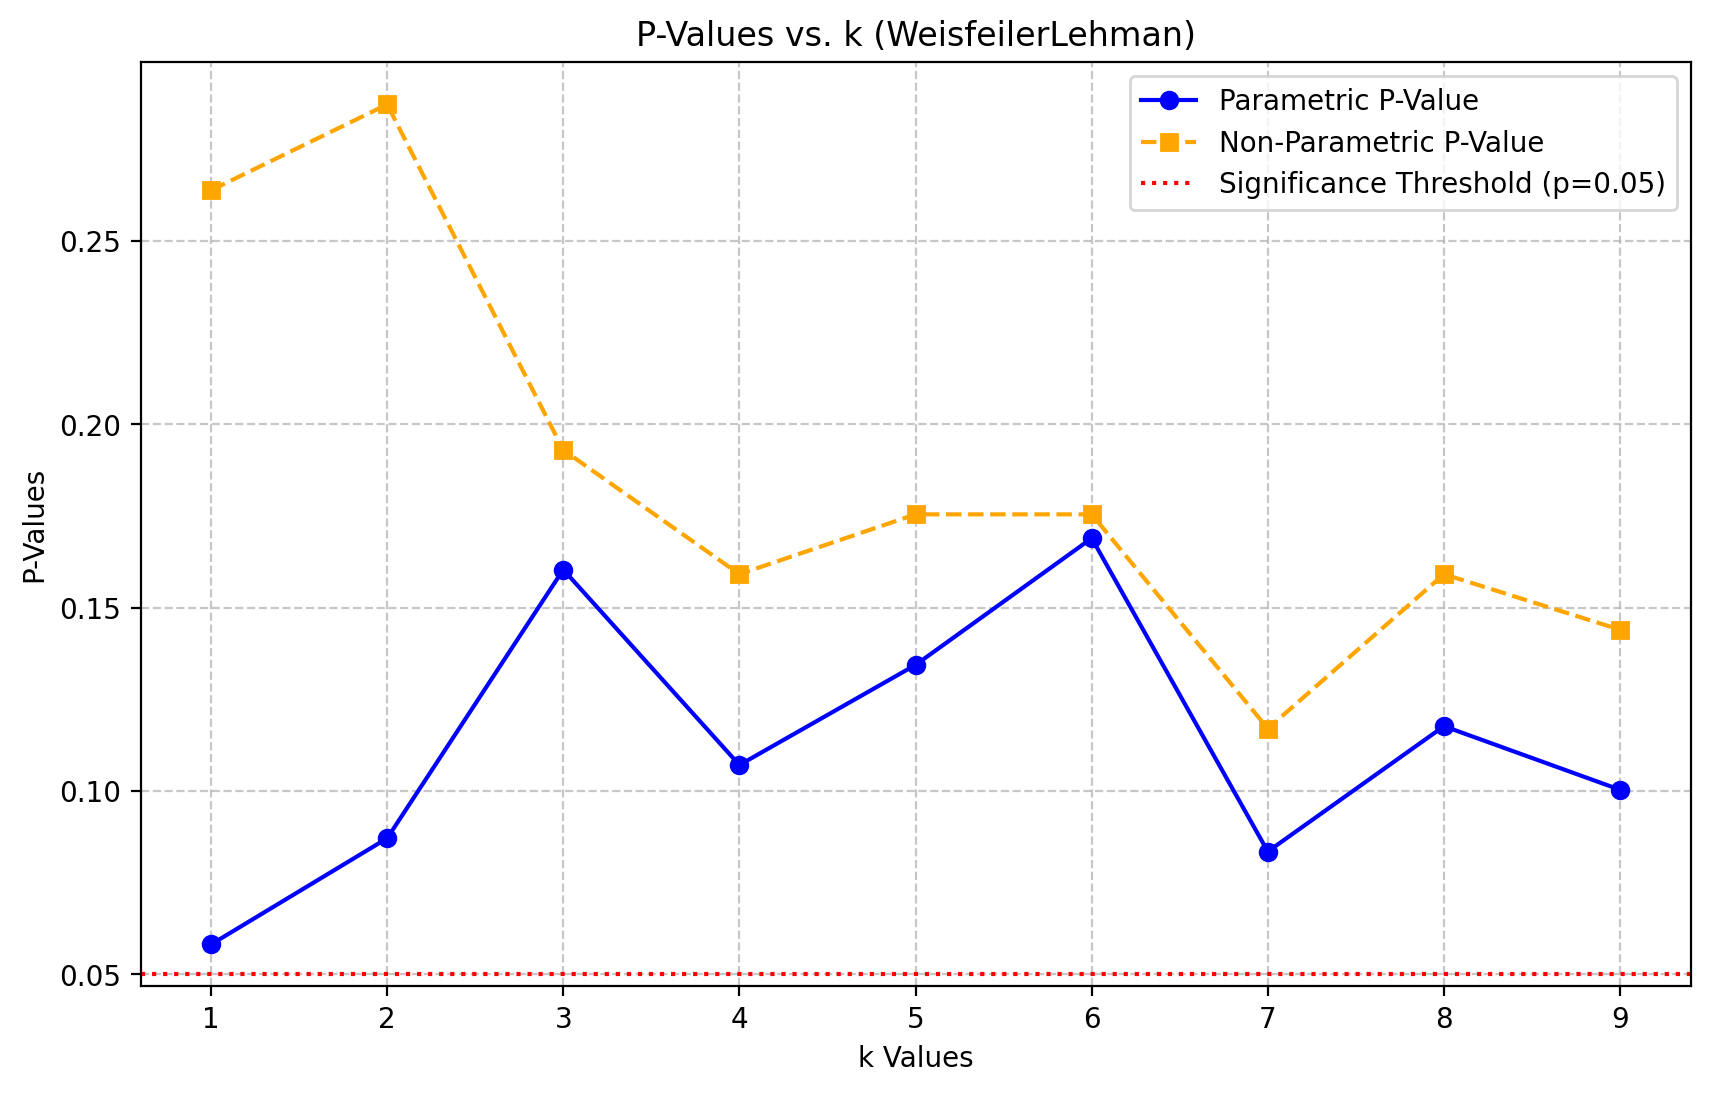

,k,normality_wtihin,normality_between,average_within,average_between,parametric_p_value,non_parametric_p_value
0,1,0.649477,0.00041,0.272789,0.123177,0.058152,0.263894
1,2,0.427742,0.000712,0.254,0.123211,0.087112,0.287314
2,3,0.837672,0.000272,0.190697,0.106318,0.160407,0.193036
3,4,0.630073,0.000271,0.20144,0.102772,0.107105,0.159159
4,5,0.511038,0.000257,0.189062,0.099424,0.13441,0.175488
5,6,0.233149,0.000368,0.176622,0.097255,0.168972,0.175488
6,7,0.700169,0.000371,0.19743,0.097397,0.083497,0.117046
7,8,0.593857,0.000371,0.186714,0.096964,0.117696,0.159159
8,9,0.588807,0.000383,0.190648,0.095848,0.100343,0.144006


In [18]:
tuner = KNNGraphTuner(graph_kernel=gk.WeisfeilerLehman(normalize=True))
tuner.calculate_and_graph()

Calculating graph statistics at k = 1
The KNN graph is disjoint. Ensuring connectivity...
The KNN graph is disjoint. Ensuring connectivity...
The KNN graph is disjoint. Ensuring connectivity...
The KNN graph is disjoint. Ensuring connectivity...
The KNN graph is disjoint. Ensuring connectivity...
The KNN graph is disjoint. Ensuring connectivity...
The KNN graph is disjoint. Ensuring connectivity...
Calculating graph statistics at k = 2
The KNN graph is disjoint. Ensuring connectivity...
The KNN graph is disjoint. Ensuring connectivity...
The KNN graph is disjoint. Ensuring connectivity...


D:\Docs\Ateneo\Thesis\thesisv3-pypi\venv\Lib\site-packages\grakel\graph.py:314: UserWarning: changing format from "adjacency" to "all"
  warnings.warn('changing format from "adjacency" to "all"')
D:\Docs\Ateneo\Thesis\thesisv3-pypi\venv\Lib\site-packages\grakel\graph.py:314: UserWarning: changing format from "adjacency" to "all"
  warnings.warn('changing format from "adjacency" to "all"')


The KNN graph is disjoint. Ensuring connectivity...
Calculating graph statistics at k = 3
The KNN graph is disjoint. Ensuring connectivity...
The KNN graph is disjoint. Ensuring connectivity...
The KNN graph is disjoint. Ensuring connectivity...


D:\Docs\Ateneo\Thesis\thesisv3-pypi\venv\Lib\site-packages\grakel\graph.py:314: UserWarning: changing format from "adjacency" to "all"
  warnings.warn('changing format from "adjacency" to "all"')
D:\Docs\Ateneo\Thesis\thesisv3-pypi\venv\Lib\site-packages\grakel\graph.py:314: UserWarning: changing format from "adjacency" to "all"
  warnings.warn('changing format from "adjacency" to "all"')


Calculating graph statistics at k = 4
The KNN graph is disjoint. Ensuring connectivity...
Calculating graph statistics at k = 5
Calculating graph statistics at k = 6


D:\Docs\Ateneo\Thesis\thesisv3-pypi\venv\Lib\site-packages\grakel\graph.py:314: UserWarning: changing format from "adjacency" to "all"
  warnings.warn('changing format from "adjacency" to "all"')
D:\Docs\Ateneo\Thesis\thesisv3-pypi\venv\Lib\site-packages\grakel\graph.py:314: UserWarning: changing format from "adjacency" to "all"
  warnings.warn('changing format from "adjacency" to "all"')


Calculating graph statistics at k = 7


D:\Docs\Ateneo\Thesis\thesisv3-pypi\venv\Lib\site-packages\grakel\graph.py:314: UserWarning: changing format from "adjacency" to "all"
  warnings.warn('changing format from "adjacency" to "all"')


Calculating graph statistics at k = 8


D:\Docs\Ateneo\Thesis\thesisv3-pypi\venv\Lib\site-packages\grakel\graph.py:314: UserWarning: changing format from "adjacency" to "all"
  warnings.warn('changing format from "adjacency" to "all"')


Calculating graph statistics at k = 9


D:\Docs\Ateneo\Thesis\thesisv3-pypi\venv\Lib\site-packages\grakel\graph.py:314: UserWarning: changing format from "adjacency" to "all"
  warnings.warn('changing format from "adjacency" to "all"')


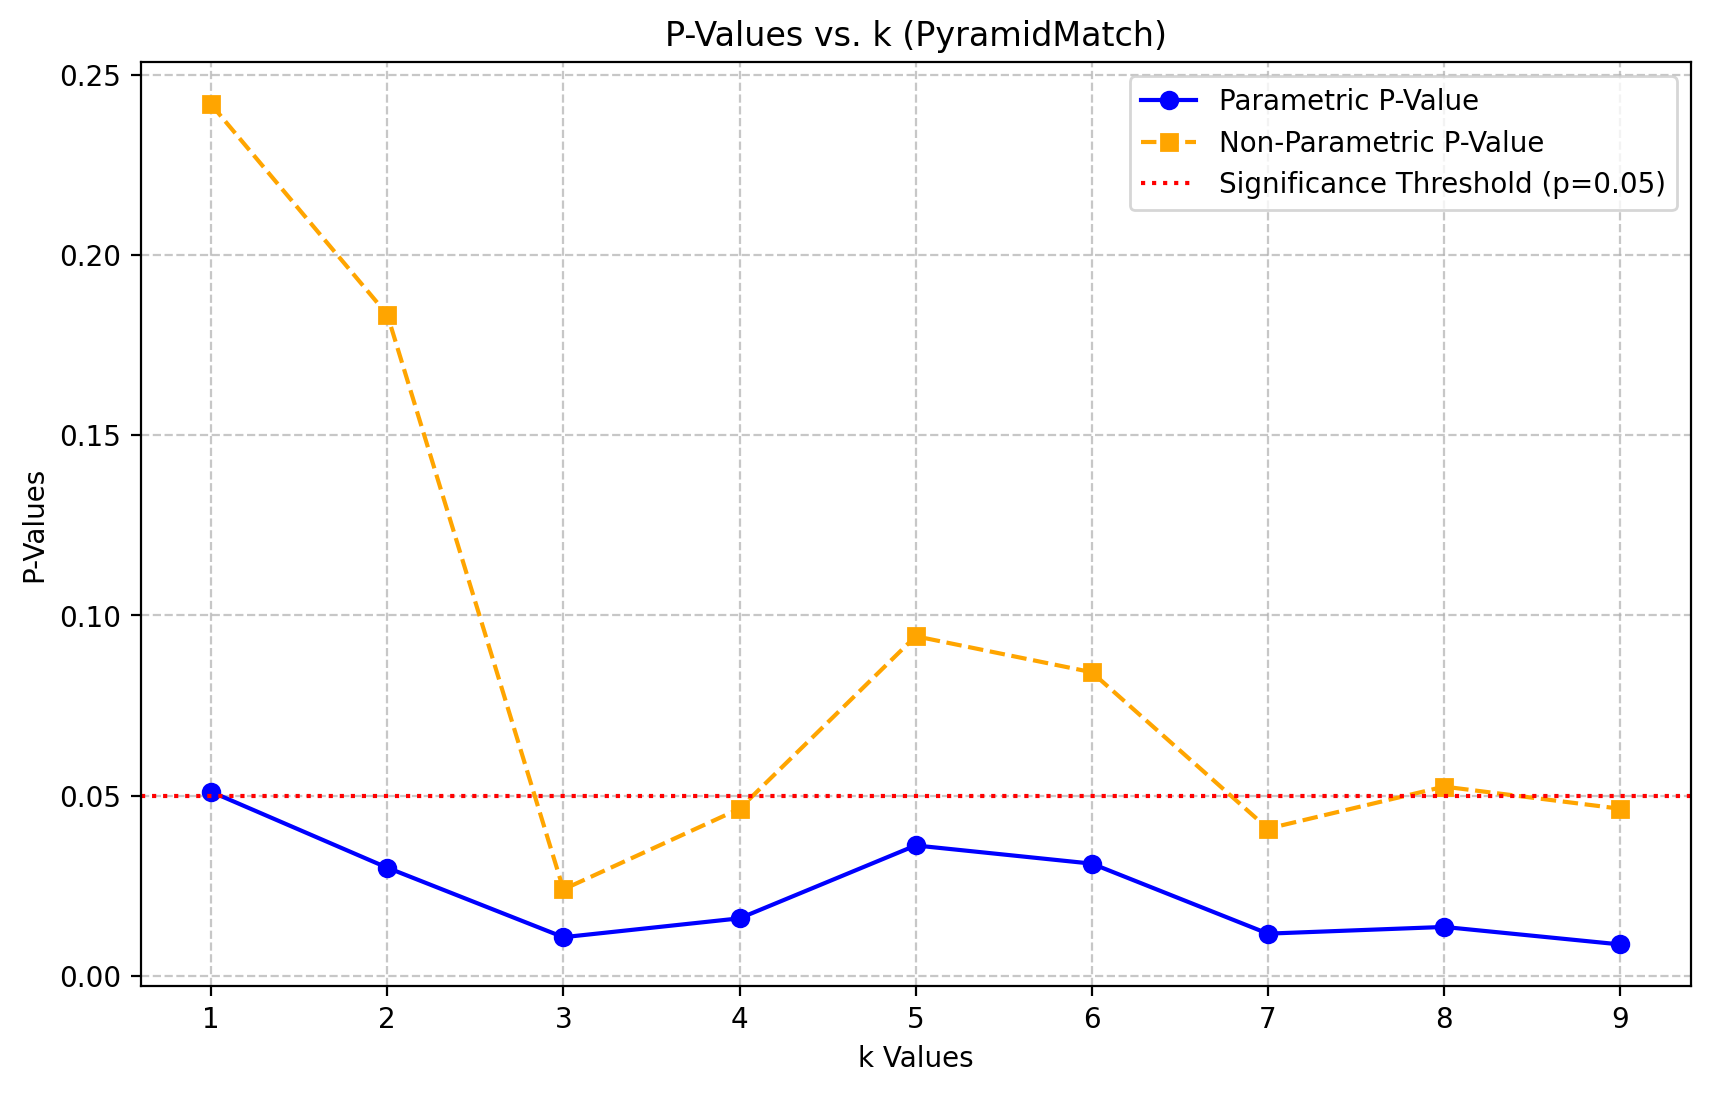

,k,normality_wtihin,normality_between,average_within,average_between,parametric_p_value,non_parametric_p_value
0,1,0.274696,0.001539,0.337841,0.161502,0.051045,0.241826
1,2,0.346711,0.000966,0.364899,0.158005,0.029969,0.183505
2,3,0.351844,0.001338,0.382032,0.158133,0.010677,0.023948
3,4,0.647028,0.001249,0.379246,0.159682,0.015916,0.046336
4,5,0.412161,0.001257,0.353472,0.161924,0.036145,0.094219
5,6,0.40083,0.001181,0.352603,0.158166,0.031099,0.084225
6,7,0.718963,0.001224,0.390651,0.157664,0.011667,0.040811
7,8,0.669369,0.001231,0.389064,0.16147,0.013528,0.052478
8,9,0.746418,0.001283,0.409337,0.161031,0.008668,0.046336


In [24]:
tuner.graph_kernel = gk.PyramidMatch(normalize=True)
tuner.calculate_and_graph()

Calculating graph statistics at k = 1
The KNN graph is disjoint. Ensuring connectivity...
The KNN graph is disjoint. Ensuring connectivity...
The KNN graph is disjoint. Ensuring connectivity...
The KNN graph is disjoint. Ensuring connectivity...
The KNN graph is disjoint. Ensuring connectivity...
The KNN graph is disjoint. Ensuring connectivity...
The KNN graph is disjoint. Ensuring connectivity...
Calculating graph statistics at k = 2
The KNN graph is disjoint. Ensuring connectivity...
The KNN graph is disjoint. Ensuring connectivity...
The KNN graph is disjoint. Ensuring connectivity...
The KNN graph is disjoint. Ensuring connectivity...
Calculating graph statistics at k = 3
The KNN graph is disjoint. Ensuring connectivity...
The KNN graph is disjoint. Ensuring connectivity...
The KNN graph is disjoint. Ensuring connectivity...
Calculating graph statistics at k = 4
The KNN graph is disjoint. Ensuring connectivity...
Calculating graph statistics at k = 5
Calculating graph statistics a

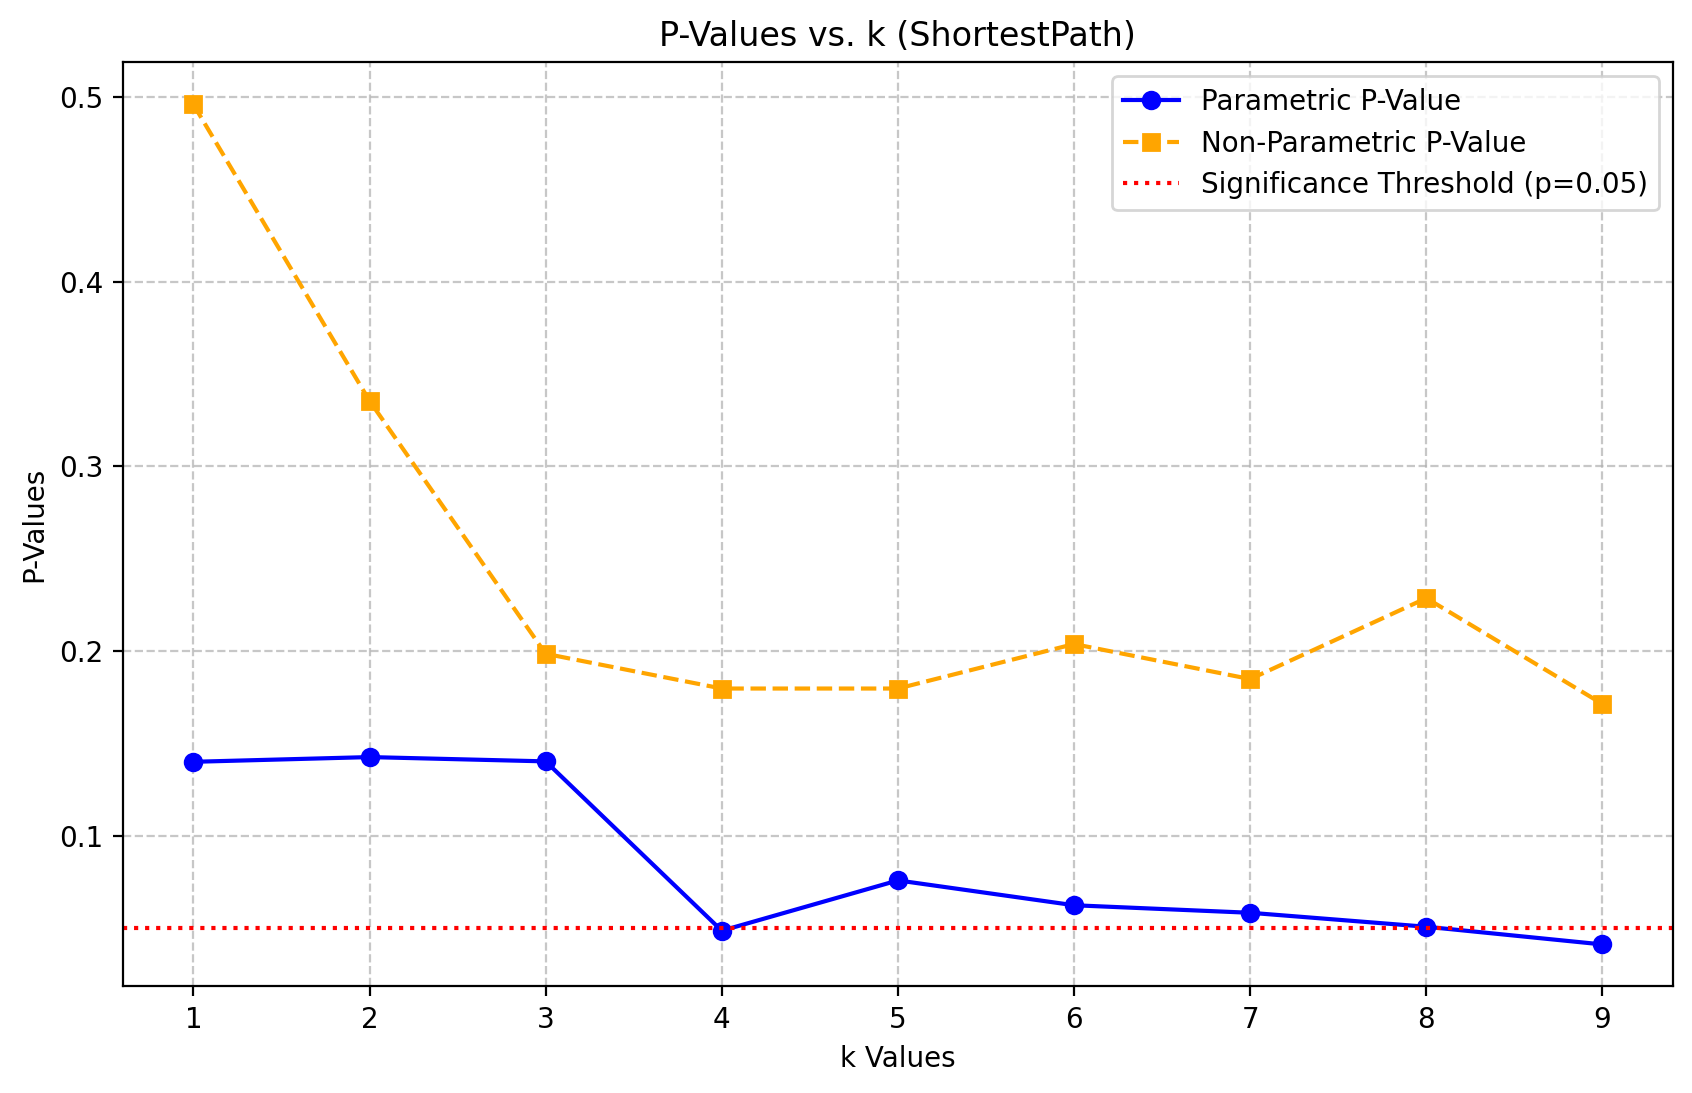

,k,normality_wtihin,normality_between,average_within,average_between,parametric_p_value,non_parametric_p_value
0,1,0.007823,0.000003,0.05395,0.019583,0.139933,0.49598
1,2,0.000482,0.000004,0.087471,0.028155,0.142492,0.335431
2,3,0.209465,0.000009,0.0821,0.036902,0.140162,0.198437
3,4,0.005366,0.000016,0.125612,0.036869,0.04845,0.179618
4,5,0.007481,0.000011,0.117198,0.038628,0.075691,0.179618
5,6,0.019227,0.000015,0.130001,0.041842,0.062234,0.203715
6,7,0.031925,0.00001,0.14502,0.046064,0.058159,0.18474
7,8,0.058456,0.00001,0.151414,0.049469,0.050591,0.228575
8,9,0.081685,0.00001,0.159153,0.050396,0.041009,0.171242


In [20]:
tuner.graph_kernel = gk.ShortestPath(normalize=True)
tuner.calculate_and_graph()

Calculating graph statistics at k = 1
The KNN graph is disjoint. Ensuring connectivity...
The KNN graph is disjoint. Ensuring connectivity...
The KNN graph is disjoint. Ensuring connectivity...
The KNN graph is disjoint. Ensuring connectivity...
The KNN graph is disjoint. Ensuring connectivity...
The KNN graph is disjoint. Ensuring connectivity...
The KNN graph is disjoint. Ensuring connectivity...


D:\Docs\Ateneo\Thesis\thesisv3-pypi\venv\Lib\site-packages\grakel\kernels\graphlet_sampling.py:324: RuntimeWarning: invalid value encountered in divide
  return np.divide(km, np.sqrt(np.outer(self._X_diag, self._X_diag)))


Calculating graph statistics at k = 2
The KNN graph is disjoint. Ensuring connectivity...
The KNN graph is disjoint. Ensuring connectivity...
The KNN graph is disjoint. Ensuring connectivity...
The KNN graph is disjoint. Ensuring connectivity...


D:\Docs\Ateneo\Thesis\thesisv3-pypi\venv\Lib\site-packages\grakel\kernels\graphlet_sampling.py:324: RuntimeWarning: invalid value encountered in divide
  return np.divide(km, np.sqrt(np.outer(self._X_diag, self._X_diag)))


Calculating graph statistics at k = 3
The KNN graph is disjoint. Ensuring connectivity...
The KNN graph is disjoint. Ensuring connectivity...
The KNN graph is disjoint. Ensuring connectivity...


D:\Docs\Ateneo\Thesis\thesisv3-pypi\venv\Lib\site-packages\grakel\kernels\graphlet_sampling.py:324: RuntimeWarning: invalid value encountered in divide
  return np.divide(km, np.sqrt(np.outer(self._X_diag, self._X_diag)))


Calculating graph statistics at k = 4
The KNN graph is disjoint. Ensuring connectivity...


D:\Docs\Ateneo\Thesis\thesisv3-pypi\venv\Lib\site-packages\grakel\kernels\graphlet_sampling.py:324: RuntimeWarning: invalid value encountered in divide
  return np.divide(km, np.sqrt(np.outer(self._X_diag, self._X_diag)))


Calculating graph statistics at k = 5
Calculating graph statistics at k = 6
Calculating graph statistics at k = 7
Calculating graph statistics at k = 8
Calculating graph statistics at k = 9


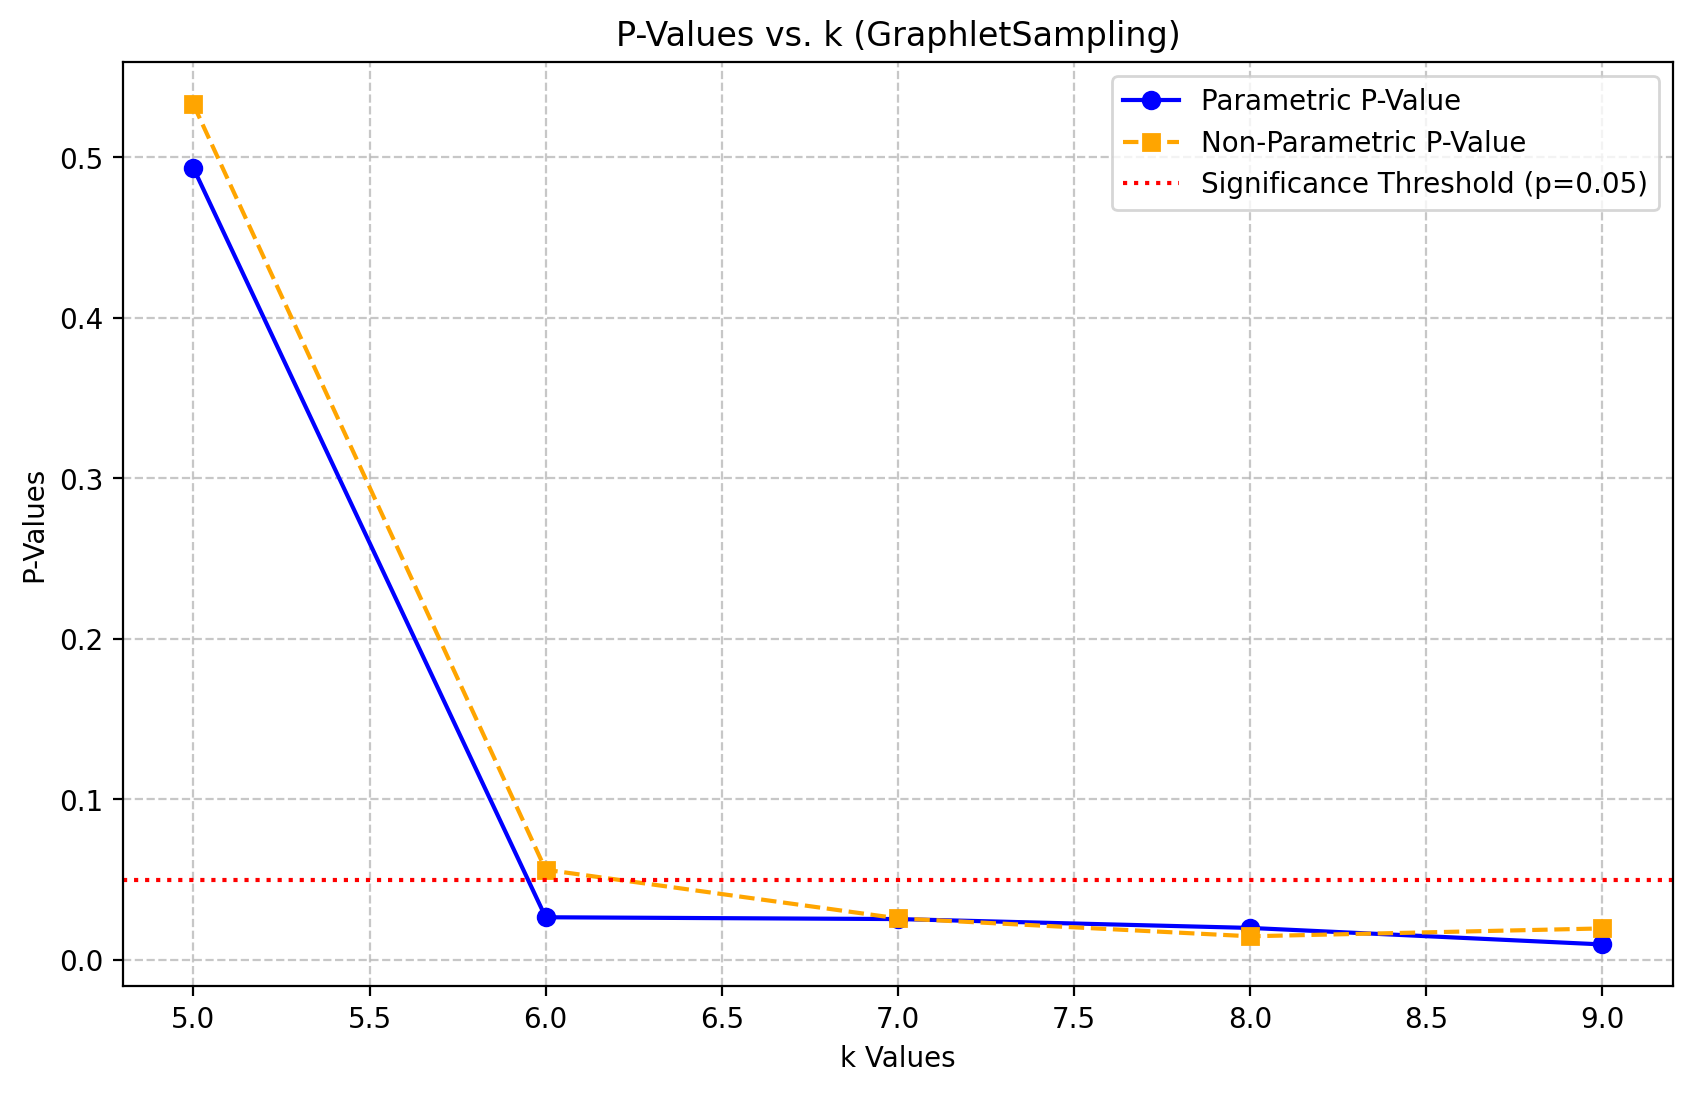

,k,normality_wtihin,normality_between,average_within,average_between,parametric_p_value,non_parametric_p_value
0,1,NaN,0.115156,NaN,0.414528,NaN,NaN
1,2,NaN,0.893215,NaN,0.427085,NaN,NaN
2,3,NaN,0.11442,NaN,0.556323,NaN,NaN
3,4,NaN,0.077193,NaN,0.478635,NaN,NaN
4,5,0.196649,0.114914,0.526876,0.429764,0.493289,0.532918
5,6,0.143389,0.005411,0.769917,0.438194,0.026509,0.056098
6,7,0.075567,0.000943,0.788664,0.418562,0.025384,0.025837
7,8,0.092892,0.000694,0.808919,0.414783,0.019861,0.014651
8,9,0.06721,0.002032,0.794458,0.364148,0.009573,0.019555


In [25]:
tuner.graph_kernel = gk.GraphletSampling(normalize=True)
tuner.calculate_and_graph()

Calculating graph statistics at k = 1
The KNN graph is disjoint. Ensuring connectivity...
The KNN graph is disjoint. Ensuring connectivity...
The KNN graph is disjoint. Ensuring connectivity...
The KNN graph is disjoint. Ensuring connectivity...
The KNN graph is disjoint. Ensuring connectivity...
The KNN graph is disjoint. Ensuring connectivity...
The KNN graph is disjoint. Ensuring connectivity...


D:\Docs\Ateneo\Thesis\thesisv3-pypi\venv\Lib\site-packages\grakel\graph.py:314: UserWarning: changing format from "adjacency" to "all"
  warnings.warn('changing format from "adjacency" to "all"')


Calculating graph statistics at k = 2
The KNN graph is disjoint. Ensuring connectivity...
The KNN graph is disjoint. Ensuring connectivity...
The KNN graph is disjoint. Ensuring connectivity...
The KNN graph is disjoint. Ensuring connectivity...


D:\Docs\Ateneo\Thesis\thesisv3-pypi\venv\Lib\site-packages\grakel\graph.py:314: UserWarning: changing format from "adjacency" to "all"
  warnings.warn('changing format from "adjacency" to "all"')


Calculating graph statistics at k = 3
The KNN graph is disjoint. Ensuring connectivity...
The KNN graph is disjoint. Ensuring connectivity...
The KNN graph is disjoint. Ensuring connectivity...


D:\Docs\Ateneo\Thesis\thesisv3-pypi\venv\Lib\site-packages\grakel\graph.py:314: UserWarning: changing format from "adjacency" to "all"
  warnings.warn('changing format from "adjacency" to "all"')


Calculating graph statistics at k = 4
The KNN graph is disjoint. Ensuring connectivity...


D:\Docs\Ateneo\Thesis\thesisv3-pypi\venv\Lib\site-packages\grakel\graph.py:314: UserWarning: changing format from "adjacency" to "all"
  warnings.warn('changing format from "adjacency" to "all"')


Calculating graph statistics at k = 5


D:\Docs\Ateneo\Thesis\thesisv3-pypi\venv\Lib\site-packages\grakel\graph.py:314: UserWarning: changing format from "adjacency" to "all"
  warnings.warn('changing format from "adjacency" to "all"')


Calculating graph statistics at k = 6


D:\Docs\Ateneo\Thesis\thesisv3-pypi\venv\Lib\site-packages\grakel\graph.py:314: UserWarning: changing format from "adjacency" to "all"
  warnings.warn('changing format from "adjacency" to "all"')


Calculating graph statistics at k = 7


D:\Docs\Ateneo\Thesis\thesisv3-pypi\venv\Lib\site-packages\grakel\graph.py:314: UserWarning: changing format from "adjacency" to "all"
  warnings.warn('changing format from "adjacency" to "all"')


Calculating graph statistics at k = 8


D:\Docs\Ateneo\Thesis\thesisv3-pypi\venv\Lib\site-packages\grakel\graph.py:314: UserWarning: changing format from "adjacency" to "all"
  warnings.warn('changing format from "adjacency" to "all"')


Calculating graph statistics at k = 9


D:\Docs\Ateneo\Thesis\thesisv3-pypi\venv\Lib\site-packages\grakel\graph.py:314: UserWarning: changing format from "adjacency" to "all"
  warnings.warn('changing format from "adjacency" to "all"')


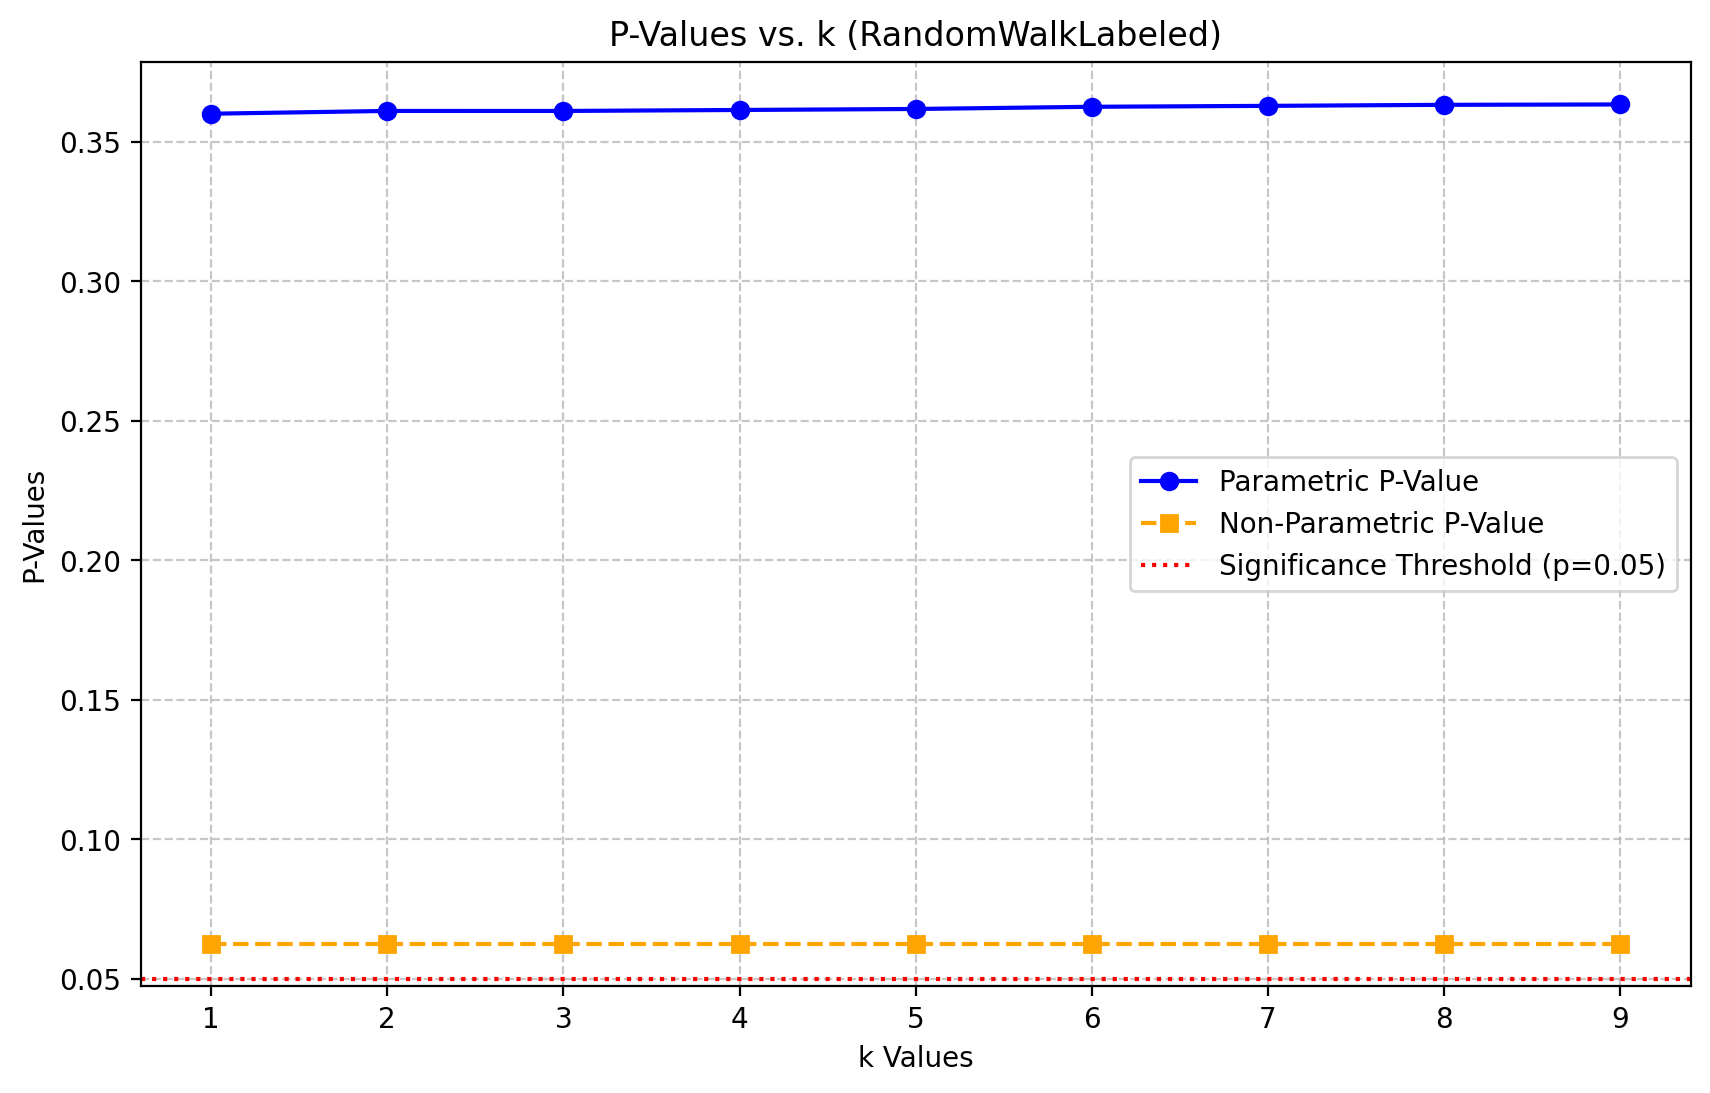

,k,normality_wtihin,normality_between,average_within,average_between,parametric_p_value,non_parametric_p_value
0,1,0.000424,0.000068,923.385695,1746.290471,0.360122,0.062297
1,2,0.000413,0.000068,925.417078,1746.567584,0.361123,0.062297
2,3,0.000413,0.000069,925.818485,1747.05894,0.361114,0.062297
3,4,0.000422,0.000069,927.104189,1747.856094,0.361465,0.062297
4,5,0.000429,0.00007,928.337161,1748.63562,0.361823,0.062297
5,6,0.00044,0.000071,930.536998,1749.79768,0.362609,0.062297
6,7,0.000448,0.000072,932.177569,1751.081635,0.362941,0.062297
7,8,0.000463,0.000073,934.292233,1752.725101,0.363311,0.062297
8,9,0.000472,0.000074,935.916002,1754.45886,0.363448,0.062297


In [26]:
tuner.graph_kernel = gk.RandomWalkLabeled()
tuner.calculate_and_graph()

In [8]:
from karateclub.graph_embedding.graph2vec import Graph2Vec

In [37]:
class GraphKMeans:
    def __init__(self, files: list[str], graphs: list[nx.Graph], k: int):
        if len(files) != len(graphs):
            raise ValueError("File array and graph array are mismatched. File names and indices must correspond to graphs or results may be incorrect")
        self.kmeans = KMeans(n_clusters=k)
        self.files = files
        self.graphs = graphs
        self.model = Graph2Vec()
        self.embeddings = None
    
    def _get_embeddings(self):
        self.model.fit(self.graphs)
        embeddings = self.model.get_embedding()
        self.embeddings = embeddings
        return embeddings
    
    def get_labels(self):
        embeddings = self._get_embeddings()
        labels = self.kmeans.fit_predict(embeddings)
        clustered_graphs = pd.DataFrame(data={"file": self.files,
                                              "label": labels})
        return clustered_graphs, labels
    
    def visualize(self, display_file_name=False):
        clustered_graphs, labels = self.get_labels()
        pca_embed = PCA(n_components=2).fit_transform(self.embeddings)
        
        fig, ax = plt.subplots()
        ax.scatter(pca_embed[:,0], pca_embed[:,1], c=labels, cmap='viridis', s=50)
        if display_file_name:
            for i, txt in enumerate(self.files):
                ax.annotate(txt, (pca_embed[i,0], pca_embed[i,1]))
        plt.show()

In [38]:
g_kmeans = GraphKMeans(batcher.processed_files, batcher.graphs, k=4)
clustered, labels = g_kmeans.get_labels()
clustered

,file,label
0,Bach - Minuet in G Major,2
1,Beethoven - Piano Sonata No. 20 in G Major Op....,2
2,Chopin - Etude Op.25 No.11 in A minor Winter Wind,0
3,Chopin - Waltz Opus 64 No.1 in D Major Minute ...,1
4,Chopin - Waltz Opus 64 No.2 in C Minor,1
5,Chopin - Waltz Opus 69 No.1 in A Major,1
6,Mozart - Menuett in G Major,3


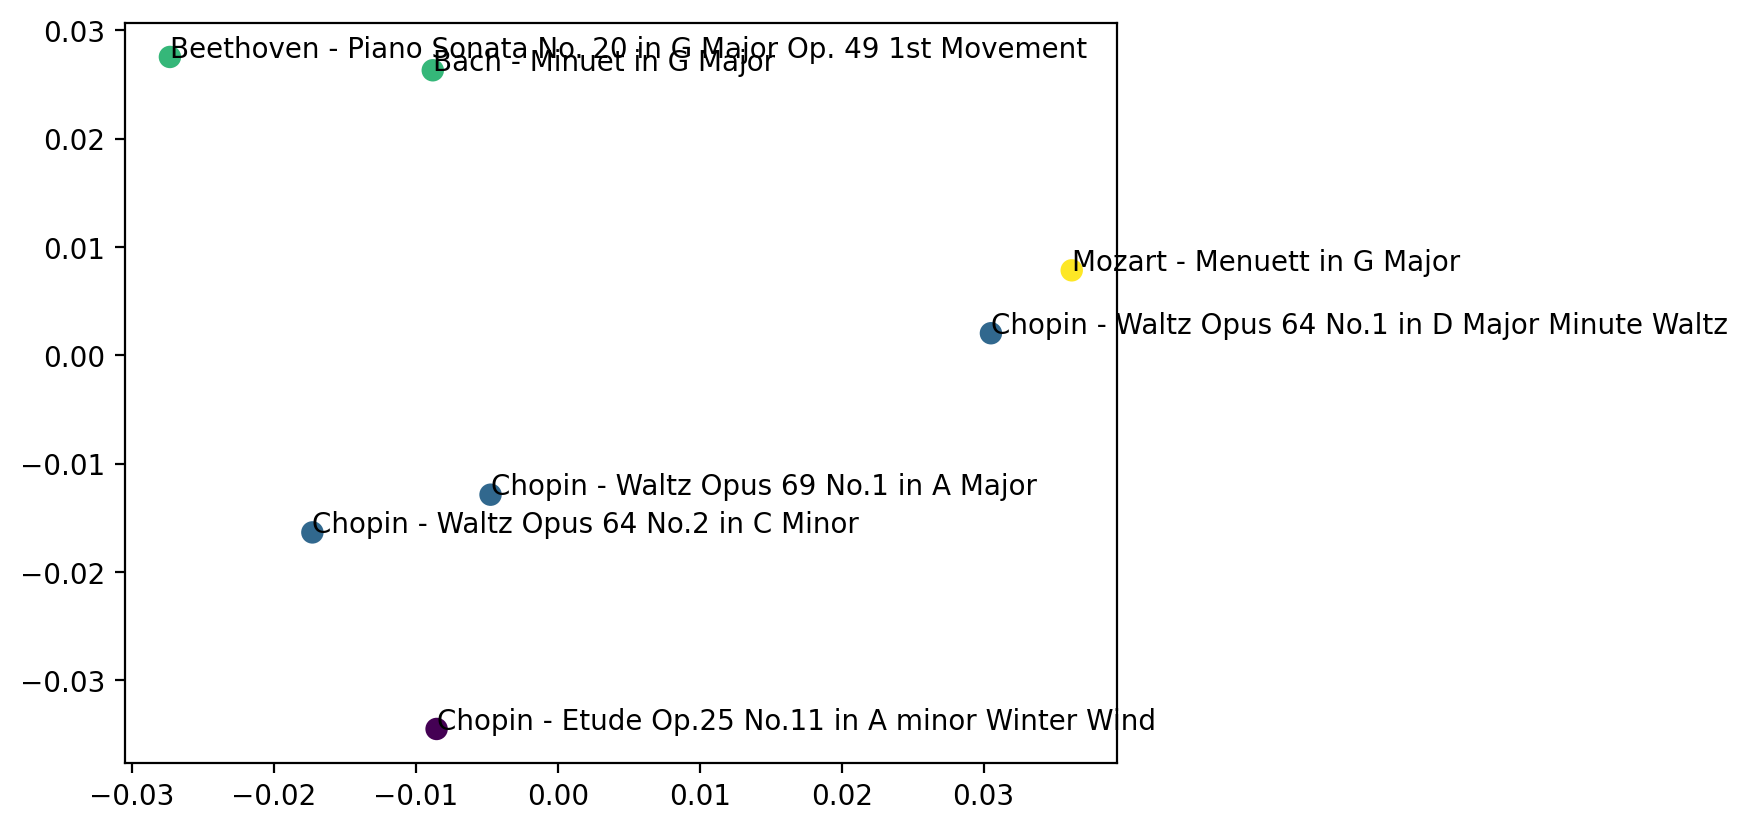

In [40]:
g_kmeans.visualize(display_file_name=True)

In [11]:
for file, graph in zip(batcher.processed_files, batcher.graphs):
    print(f"{file}: {graph}")

Bach - Minuet in G Major: Graph with 10 nodes and 30 edges
Beethoven - Piano Sonata No. 20 in G Major Op. 49 1st Movement: Graph with 64 nodes and 213 edges
Chopin - Etude Op.25 No.11 in A minor Winter Wind: Graph with 136 nodes and 435 edges
Chopin - Waltz Opus 64 No.1 in D Major Minute Waltz: Graph with 30 nodes and 100 edges
Chopin - Waltz Opus 64 No.2 in C Minor: Graph with 24 nodes and 73 edges
Chopin - Waltz Opus 69 No.1 in A Major: Graph with 40 nodes and 133 edges
Mozart - Menuett in G Major: Graph with 11 nodes and 37 edges


In [20]:
model = Graph2Vec()
model.fit(graphs=batcher.graphs)
embeddings = model.get_embedding()
embeddings

array([[ 6.25630282e-03,  7.31569761e-03,  6.22279616e-03,
        -5.97847439e-03, -6.62168395e-03, -3.54364375e-03,
        -3.34127294e-03,  3.58426338e-03, -5.21042803e-03,
        -6.60464587e-03, -3.61589878e-03,  7.58166239e-03,
        -3.63551429e-03,  1.17380091e-03,  6.87622745e-03,
         3.38321039e-03, -7.46439095e-04,  7.28644012e-03,
        -4.65492206e-03,  4.31493437e-03,  3.14617157e-03,
        -2.75482866e-03, -7.19394186e-04, -6.89559150e-03,
         4.19140488e-05, -2.07601534e-03,  7.75003340e-03,
        -3.69096454e-03, -5.27328905e-03,  8.74419231e-04,
        -6.11307565e-03, -6.22178428e-03, -5.11469692e-03,
        -4.76611825e-03, -3.40195955e-03, -1.52780698e-03,
        -1.94035831e-03,  4.50723805e-03,  5.34844678e-03,
        -3.54412268e-03, -4.96171182e-03,  6.16732403e-04,
        -3.51126422e-03,  2.55130126e-05,  5.60822804e-03,
         3.03015392e-03, -4.21644701e-03, -1.00385339e-03,
         1.35114999e-04, -6.30665896e-03,  7.70948315e-0

In [21]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4)
labels = kmeans.fit_predict(embeddings)
labels

array([2, 2, 0, 1, 1, 1, 3])

In [22]:
for file, label in zip(batcher.processed_files, labels):
    print(f"{file}: {label}")

Bach - Minuet in G Major: 2
Beethoven - Piano Sonata No. 20 in G Major Op. 49 1st Movement: 2
Chopin - Etude Op.25 No.11 in A minor Winter Wind: 0
Chopin - Waltz Opus 64 No.1 in D Major Minute Waltz: 1
Chopin - Waltz Opus 64 No.2 in C Minor: 1
Chopin - Waltz Opus 69 No.1 in A Major: 1
Mozart - Menuett in G Major: 3


In [23]:
from sklearn.decomposition import PCA
pca_embed = PCA(n_components=2).fit_transform(embeddings)
pca_embed

array([[-0.00881367,  0.0263018 ],
       [-0.0273387 ,  0.02753084],
       [-0.00854465, -0.03448823],
       [ 0.03052204,  0.00203272],
       [-0.01729831, -0.0163487 ],
       [-0.00474262, -0.01286775],
       [ 0.03621592,  0.00783934]], dtype=float32)

In [24]:
# from sklearn.cluster import KMeans
# kmeans = KMeans(n_clusters=4)
# labels = kmeans.fit_predict(pca_embed)
# labels

In [25]:
for song, label in zip(batcher.processed_files, labels):
    print(f"{song}: {label}")

Bach - Minuet in G Major: 2
Beethoven - Piano Sonata No. 20 in G Major Op. 49 1st Movement: 2
Chopin - Etude Op.25 No.11 in A minor Winter Wind: 0
Chopin - Waltz Opus 64 No.1 in D Major Minute Waltz: 1
Chopin - Waltz Opus 64 No.2 in C Minor: 1
Chopin - Waltz Opus 69 No.1 in A Major: 1
Mozart - Menuett in G Major: 3


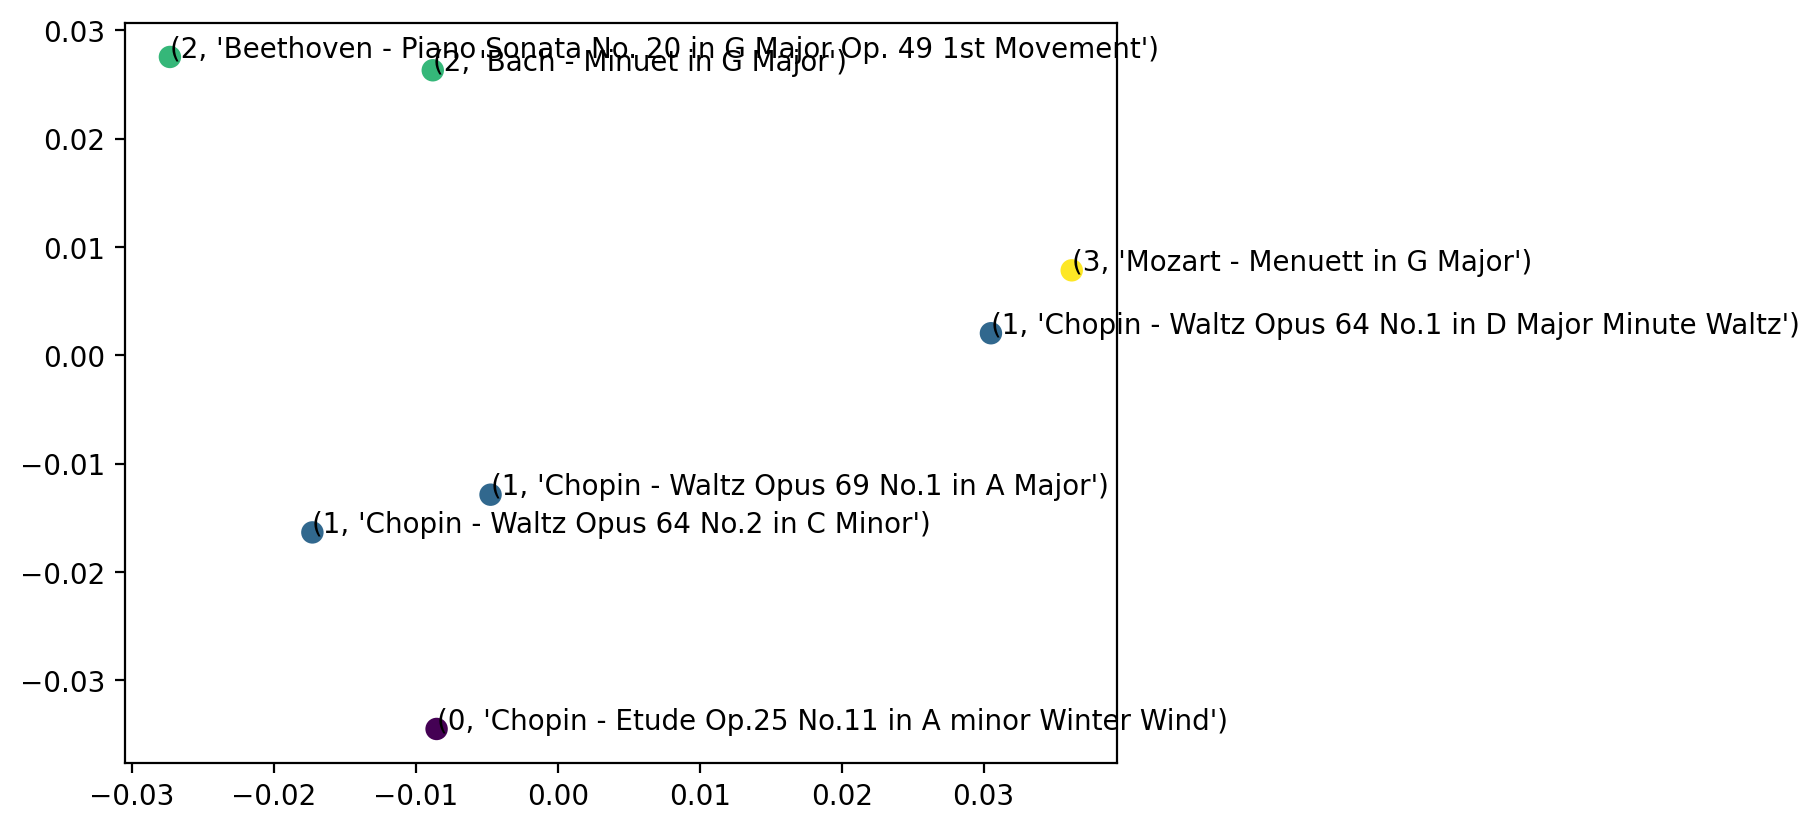

In [27]:
fig, ax = plt.subplots()
ax.scatter(pca_embed[:, 0], pca_embed[:, 1], c=labels, cmap='viridis', s=50)
for i, txt in enumerate(batcher.processed_files):
    ax.annotate((labels[i],txt), (pca_embed[i,0], pca_embed[i,1]))

In [33]:
def mobility(nmat: pd.DataFrame):
    """
    Melodic motion as a mobility (Hippel, 2000).
    Based on mobility function from MidiToolKit (Toiviainen. 2016)
    """
    if len(nmat) == 0:
        return np.array([])
    
    pitches = nmat['midi_pitch'].to_numpy()
    n = len(nmat.index)
    
    if n < 2:
        return np.zeros(n)
    
    mob = np.zeros(n)
    y = np.zeros(n)
    
    for i in range(1, n):
        mean_pitch = np.mean(pitches[:i])
        
        p = pitches[:i] - mean_pitch
        p2 = pitches[1:i+1] - mean_pitch
        
        if len(p) > 1:
            correlation_matrix = np.corrcoef(p, p2)
            mob[i] = correlation_matrix[0, 1] if not np.isnan(correlation_matrix[0, 1]) else 0
            
        y[i-1] = mob[i-1] * (pitches[i] - mean_pitch) 
        
    y[-1] = 0
    
    return np.abs(y)

In [ ]:
mobility(analyzer.nmat)

In [ ]:
analyzer.nmat['mobility'] = mobility(analyzer.nmat)
analyzer.nmat

In [ ]:
def tessitura(nmat:pd.DataFrame):
    """
    Melodic tessitura based on deviation from median pitch height (Hippel, 2000)
    Based on tessitura function from MidiToolKit (Toiviainen. 2016)
    """
    n = len(nmat.index)
    if n < 2:
        return np.zeros(n)
    pitches = nmat['midi_pitch'].to_numpy()
    deviation = np.zeros(n)
    y = np.zeros(n)
    for i in range(1, n):
        median_pitch = np.median(pitches[:i])
        deviation[i-1] = np.std(pitches[:i])
        y[i-1] = (pitches[i] - median_pitch) / deviation[i-1]
        y[0] = 0
    return np.abs(y)

In [12]:
tessitura(analyzer.nmat)

C:\Users\RJ Conanan\AppData\Local\Temp\ipykernel_22716\1617671666.py:11: RuntimeWarning: divide by zero encountered in scalar divide
  y[i-1] = (pitches[i] - median_pitch) / deviation[i-1]


array([0.        , 0.42857143, 0.67936622, 0.77338919, 1.24140883,
       1.76882881, 1.44398974, 2.10696615, 0.30689745, 0.80311571,
       1.29077223, 1.84494127, 1.96530067, 1.5513054 , 1.25418762,
       0.        , 0.50774554, 0.        , 0.26626213, 0.81808886,
       0.27522203, 0.        , 0.28767986, 0.88067218, 1.47890164,
       1.60199581, 1.1352708 , 0.56353316, 0.        , 1.15959621,
       0.86520051, 1.15771937, 0.57624892, 0.        , 0.29544545,
       0.89741741, 1.1988621 , 1.19319408, 1.48616998, 0.29223561,
       0.88643037, 1.4805998 , 2.04539587, 2.26222762, 1.0873404 ,
       1.08248405, 0.26964333, 0.81712732, 0.27363629, 0.1381574 ,
       0.55808575, 0.        , 0.28331311, 0.        , 0.57695306,
       1.15990578, 0.57752805, 0.        , 0.58560974, 1.17733376,
       1.46661737, 1.16274416, 3.48028824, 2.14077955, 2.60781429,
       3.00760457, 1.9024564 , 2.34171109, 0.68413399, 1.14630939,
       1.60573411, 0.6836025 , 1.83276634, 1.02018688, 1.36216

In [9]:
from thesisv3.utils.helpers import nx_to_grakel
import networkx as nx
from grakel import Graph

In [46]:
labels = nx.get_node_attributes(G, 'label')
labels

{0: 0.5066099043582991,
 1: 0.5608161407295784,
 2: 0.5414856248890305,
 3: 0.49303341936932304,
 4: 0.5711644721156067,
 5: 0.5082863487252414,
 6: 0.5329543595741193,
 7: 0.5837986481036845,
 8: 0.5590003806181906,
 9: 0.5737305726952793}

In [10]:
# edges = list(G.edges())

In [11]:
# grakel_g = Graph(edges, node_labels=labels)

In [12]:
# print(grakel_g)

In [8]:
visualizer = MusicVisualizer(analyzer)

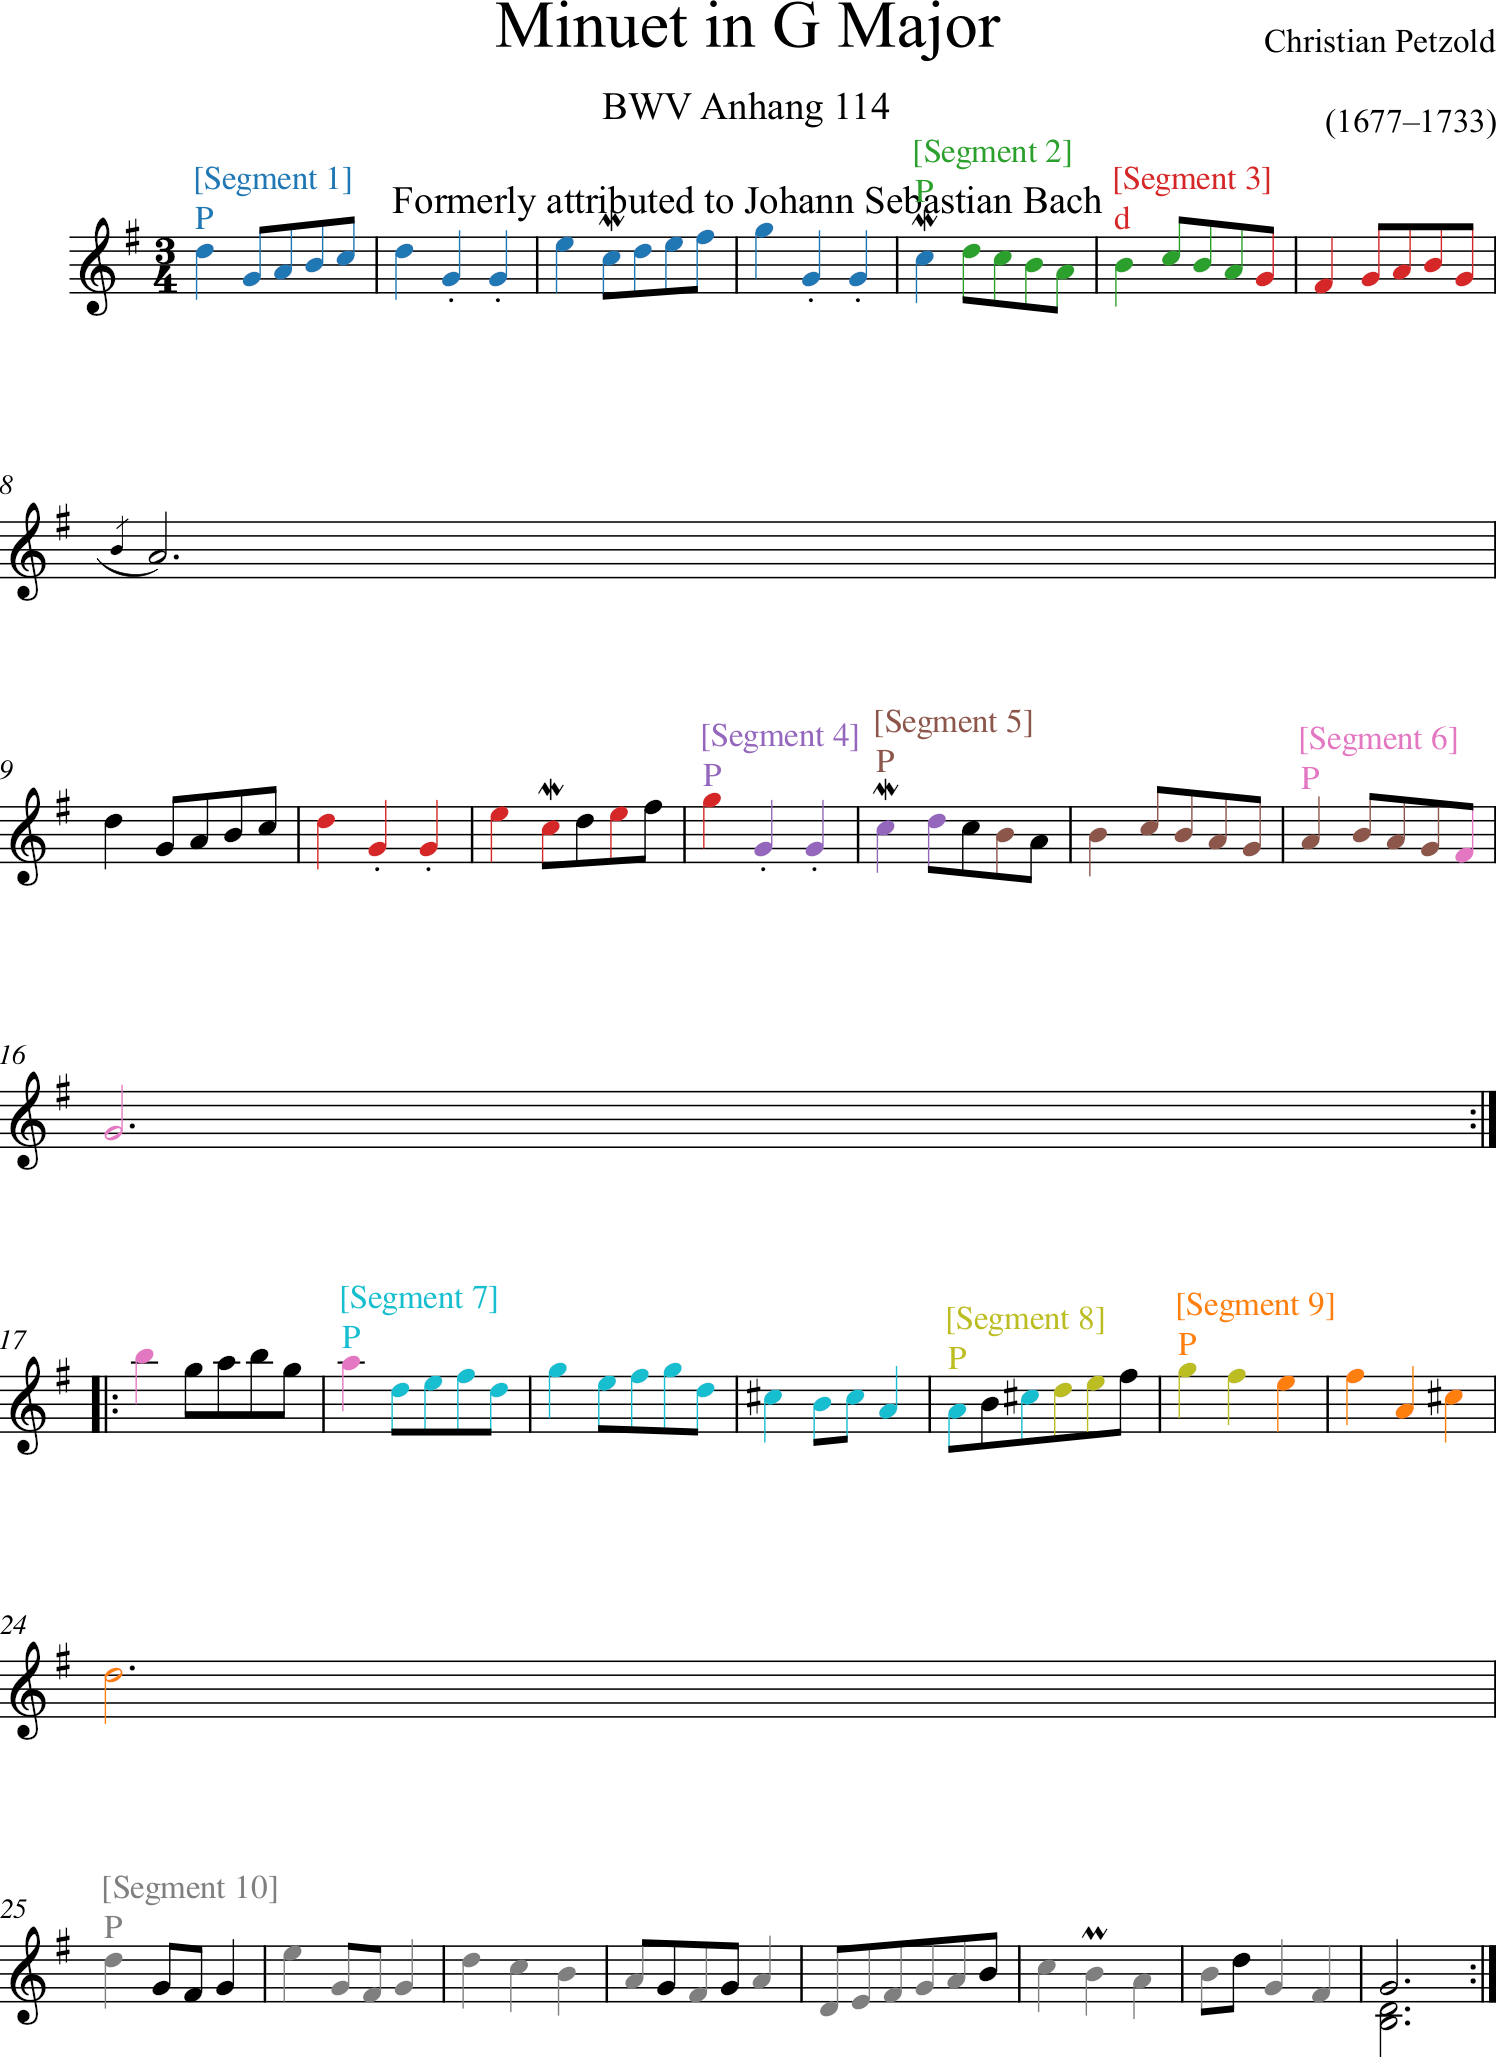

In [9]:
visualizer.visualize_colored_segments()

In [10]:
visualizer.visualize_multiple_segments(5)

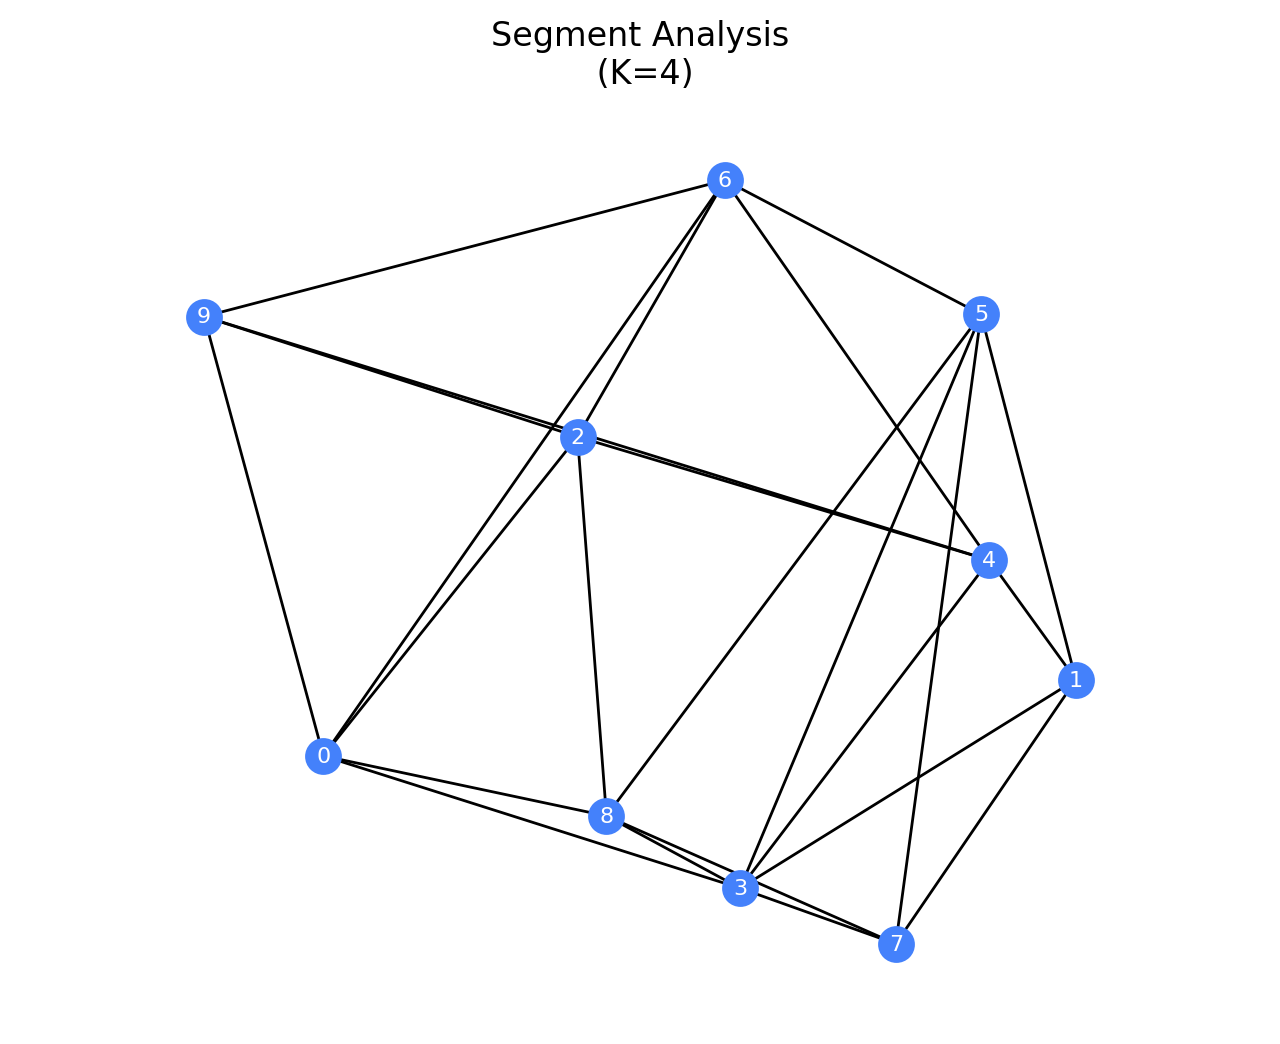

In [11]:
visualizer.visualize_knn_graph(k=4, title="Segment Analysis")